In [228]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
# pip install netgraph
from netgraph import Graph
import evaluate as ev

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [248]:
random_graph_test=nx.random_partition_graph([3, 5, 4,5], 0.9, 0.1)
#random_graph_test = nx.complete_graph(9)
random_graph_test = nx.path_graph(3)

In [249]:
clustering=community.label_propagation_communities(random_graph_test)

In [250]:
cutratio = ev.cut_ratio(random_graph_test,clustering)
print(cutratio)

0


In [209]:
len(clustering)

4

Outer loop: Iterate over the communities

Inner loop: Iterate over nodes in each community

node_to_community dictionary stores which node belongs to which community

In [210]:
node_to_community = dict()
com_id=0
for cluster in clustering:
    for node in cluster:
        node_to_community[node]=com_id
        
    com_id+=1

This block basically plots the graphs and colors according to community

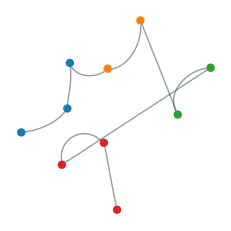

In [211]:
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:pink'
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(random_graph_test,
      node_color=node_color, node_edge_width=0, edge_alpha=0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled'
)

plt.show()

In [49]:
nx.density(random_graph_test)

0.02

Find average degree

\begin{equation}
\text { average degree }=\frac{1}{\text { number of vertices }} \sum_{v} \operatorname{deg}(v)
\end{equation}

In [36]:
def average_degree(G):
    sum_of_degrees=sum(dict(G.degree).values())
    num_of_nodes=G.number_of_nodes()
    avg_degree=sum_of_degrees/num_of_nodes
    return avg_degree

In [37]:
print(average_degree(random_graph_test))

1.8


In [38]:
coverage, performance = ev.cov_per(random_graph_test, clustering)

In [39]:
for block in clustering:
    print(block)

{0, 1, 2}
{3, 4}
{5, 6}
{8, 9, 7}


In [40]:
next(iter(clustering))

{0, 1, 2}

In [41]:
coverage

0.6666666666666666

In [42]:
performance

0.8888888888888888

In [43]:
for e in random_graph_test.edges():
    print(e[0])
    print(e[1])
    

0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9


In [44]:
random_graph_test.edges()

EdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])